In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
s_data = pd.read_csv('Salary_Data.csv')

In [3]:
s_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [92]:
s_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
#Visualisation of salary growth relative to experience in years 

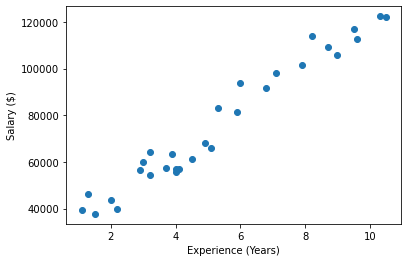

In [5]:
plt.scatter(s_data.YearsExperience, s_data.Salary)
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.show()

In [6]:
s_data.YearsExperience.values

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [7]:
X = s_data.iloc[:,:-1].values
y=s_data.iloc[:,-1].values

In [8]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [10]:
#Spliting the dataset into Test and Train

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=101)

In [13]:
X_train

array([[ 3.9],
       [ 2. ],
       [ 1.3],
       [ 6. ],
       [ 7.9],
       [ 4. ],
       [ 2.9],
       [ 4.5],
       [ 1.1],
       [ 7.1],
       [ 2.2],
       [ 3.2],
       [ 4.1],
       [ 3.7],
       [ 4.9],
       [10.5],
       [ 8.2],
       [ 3. ],
       [ 5.3],
       [ 4. ]])

In [14]:
X_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [15]:
y_train

array([ 63218.,  43525.,  46205.,  93940., 101302.,  56957.,  56642.,
        61111.,  39343.,  98273.,  39891.,  64445.,  57081.,  57189.,
        67938., 121872., 113812.,  60150.,  83088.,  55794.])

In [16]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [18]:
LR.fit(X_train,y_train)

LinearRegression()

In [19]:
#Prediction of X_test data 

In [20]:
y_pred_X=LR.predict(X_test)

In [21]:
y_pred_X

array([ 91477.92796603, 109893.22802466,  56585.7804865 ,  82754.89109615,
        40108.93306562, 118616.26489454, 117647.03857567,  75001.08054514,
       112800.90698129, 125400.84912667])

In [35]:
diff=y_test-y_pred_X

In [39]:
res_df=pd.concat([pd.Series(y_pred_X),pd.Series(y_test),pd.Series(diff)],axis=1)
res_df.columns=['Prediction','Original Data','Diff']

In [40]:
res_df

,Prediction,Original Data,Diff
0,91477.927966,91738.0,260.072034
1,109893.228025,109431.0,-462.228025
2,56585.780487,54445.0,-2140.780487
3,82754.891096,81363.0,-1391.891096
4,40108.933066,37731.0,-2377.933066
5,118616.264895,112635.0,-5981.264895
6,117647.038576,116969.0,-678.038576
7,75001.080545,66029.0,-8972.080545
8,112800.906981,105582.0,-7218.906981
9,125400.849127,122391.0,-3009.849127


Visualization of the Prediction against the Orginal Data (Salary)

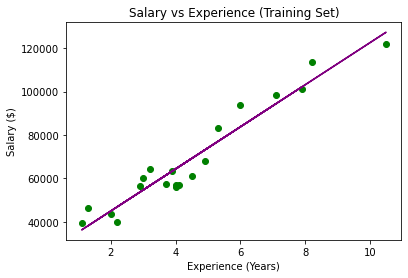

In [45]:
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,LR.predict(X_train),color='purple')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.show()

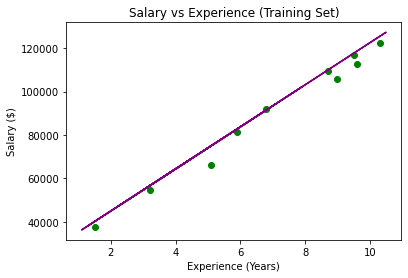

In [46]:
plt.scatter(X_test,y_test,color='green')
plt.plot(X_train,LR.predict(X_train),color='purple')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')
plt.show()

# Metrics

In [51]:
from sklearn import metrics
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_pred_X))
R2=metrics.r2_score(y_test,y_pred_X)

In [49]:
#Root Mean Square Error
rmse

4363.043260343273

In [86]:
#R-Squared(R2)- To determine how well the model fits the data

In [52]:
R2

0.974811112371526

In [56]:
LR.predict([[6.3]])

array([86631.79637165])

# Decision Tree Regression

In [85]:
#Classification of the model in a tree structure form

In [90]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import DecisionTreeClassifier

In [67]:
DT=DecisionTreeRegressor()

In [68]:
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [70]:
y_pred_dt=DT.predict(X_test)

In [71]:
y_pred_dt

array([ 98273., 113812.,  64445.,  93940.,  46205., 121872., 121872.,
        67938., 113812., 121872.])

In [72]:
y_test

array([ 91738., 109431.,  54445.,  81363.,  37731., 112635., 116969.,
        66029., 105582., 122391.])

In [73]:
diff_DT=y_test-y_pred_dt

In [76]:
res_dt=pd.concat([pd.Series(y_pred_dt),pd.Series(y_test),pd.Series(diff_DT)],axis=1)
res_dt.columns=['Prediction','Original Data','Diff']

In [77]:
res_dt

,Prediction,Original Data,Diff
0,98273.0,91738.0,-6535.0
1,113812.0,109431.0,-4381.0
2,64445.0,54445.0,-10000.0
3,93940.0,81363.0,-12577.0
4,46205.0,37731.0,-8474.0
5,121872.0,112635.0,-9237.0
6,121872.0,116969.0,-4903.0
7,67938.0,66029.0,-1909.0
8,113812.0,105582.0,-8230.0
9,121872.0,122391.0,519.0


In [78]:
from sklearn import metrics
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt))
R2=metrics.r2_score(y_test,y_pred_dt)

In [79]:
rmse

7568.996703658947

In [80]:
R2

0.9241934760377903

In [81]:
from sklearn import tree

In [82]:
text_representation=tree.export_text(DT)
print(text_representation)

|--- feature_0 <= 5.10
|   |--- feature_0 <= 2.55
|   |   |--- feature_0 <= 1.20
|   |   |   |--- value: [39343.00]
|   |   |--- feature_0 >  1.20
|   |   |   |--- feature_0 <= 2.10
|   |   |   |   |--- feature_0 <= 1.65
|   |   |   |   |   |--- value: [46205.00]
|   |   |   |   |--- feature_0 >  1.65
|   |   |   |   |   |--- value: [43525.00]
|   |   |   |--- feature_0 >  2.10
|   |   |   |   |--- value: [39891.00]
|   |--- feature_0 >  2.55
|   |   |--- feature_0 <= 4.70
|   |   |   |--- feature_0 <= 3.95
|   |   |   |   |--- feature_0 <= 2.95
|   |   |   |   |   |--- value: [56642.00]
|   |   |   |   |--- feature_0 >  2.95
|   |   |   |   |   |--- feature_0 <= 3.80
|   |   |   |   |   |   |--- feature_0 <= 3.45
|   |   |   |   |   |   |   |--- feature_0 <= 3.10
|   |   |   |   |   |   |   |   |--- value: [60150.00]
|   |   |   |   |   |   |   |--- feature_0 >  3.10
|   |   |   |   |   |   |   |   |--- value: [64445.00]
|   |   |   |   |   |   |--- feature_0 >  3.45
|   |   |   |   |

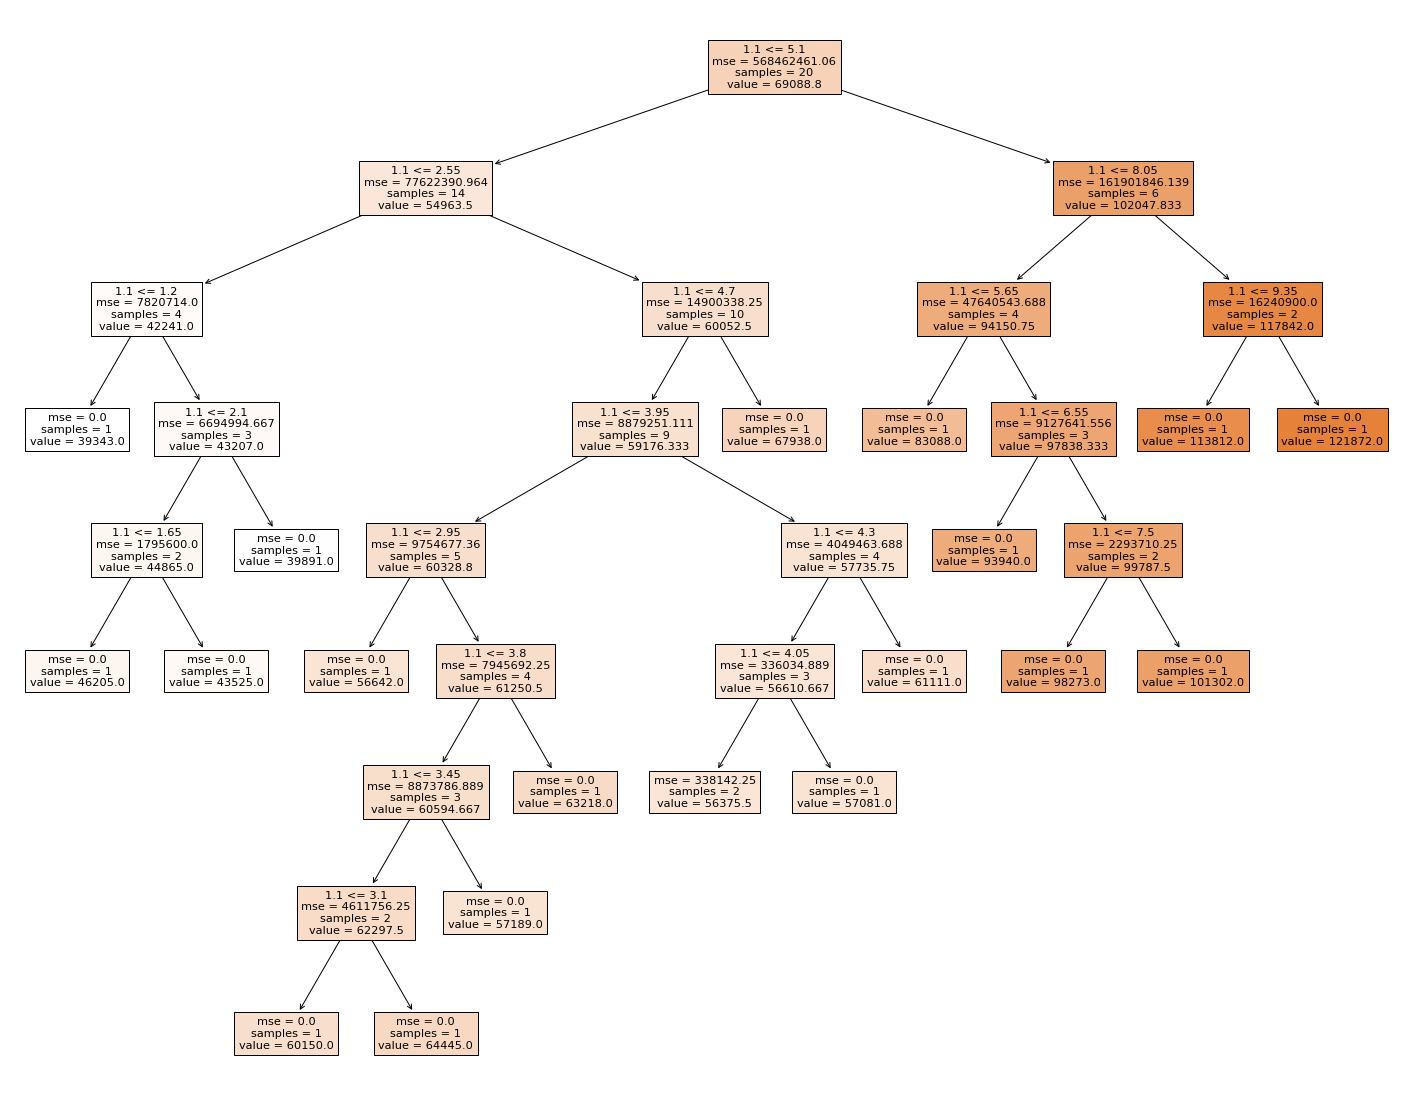

In [84]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(DT,feature_names=s_data['YearsExperience'],filled=True)